In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import random
import numpy as np
import pandas as pd
import scanpy as sc
import multigrate as mtg
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
DPI = 300
random.seed(123)

# Load data

In [3]:
# ref
scrna1=sc.read('../data/q_to_r/scrna1.h5ad')
scrna2=sc.read('../data/q_to_r/scrna2.h5ad')
cite1=sc.read('../data/q_to_r/cite1.h5ad')
cite2=sc.read('../data/q_to_r/cite2.h5ad')
scrna3=sc.read('../data/q_to_r/scrna3.h5ad')
atac3=sc.read('../data/q_to_r/atac3.h5ad')
scrna4=sc.read('../data/q_to_r/scrna4.h5ad')
cite4=sc.read('../data/q_to_r/cite4.h5ad')
# query
scrna_query3=sc.read('../data/q_to_r/scrna_q3.h5ad')
cite_query3=sc.read('../data/q_to_r/cite_q3.h5ad')

# Load the model

In [5]:
model = mtg.models.MultiVAE_PoE_cond(
    adatas=[[scrna1, scrna2, scrna3, scrna4], [cite1, cite2, cite4], [atac3]],
    names=[['rna1', 'rna2', 'rna3', 'rna4'], ['cite1', 'cite2', 'cite4'], ['atac3']],
    pair_groups=[["pair1", "pair2", "pair3", "pair4"], ["pair1", "pair2", "pair4"], ["pair3"]],
    condition=True,
    z_dim=20,
    h_dim=32,
    hiddens=[[], [], []],
    output_activations=['linear', 'linear', 'linear'],
    losses=['nb', 'mse', 'mse'],
    layers=[['count', 'count', 'count', 'count'], [None, None, None], [None]],
    shared_hiddens=[],
    recon_coef=1,
    kl_coef=1e-6,
    integ_coef=0.1,
    dropout=0.2,
)

In [6]:
model.load('../../output/qr/poe_cond_kl(0.0000010)_integ(0.1000000)')

# Prepare the query data

In [43]:
scrna_query3 = scrna_query3[scrna_query3.obs.Worst_Clinical_Status != 'nan']
scrna_query3

View of AnnData object with n_obs × n_vars = 452373 × 4000
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'Batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'cell_type', 'sample_id', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'batch'
    var: 'names-0', 'n_cells-0', 'mt-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'm

In [57]:
scrna_query3.obs_names = [name[:-2] for name in scrna_query3.obs_names]

In [58]:
idx = random.sample(list(scrna_query3.obs_names), 50000)

In [61]:
cite_query3 = cite_query3[idx]
cite_query3

View of AnnData object with n_obs × n_vars = 50000 × 61
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'cell_type'
    var: 'feature_types'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'count'

In [62]:
scrna_query3 = scrna_query3[idx]
scrna_query3

View of AnnData object with n_obs × n_vars = 50000 × 4000
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'Batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'cell_type', 'sample_id', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'batch'
    var: 'names-0', 'n_cells-0', 'mt-0', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'me

# Perform architecture surgery

In [63]:
new_model = mtg.operate(model,
    adatas=[[scrna_query3], [cite_query3]], 
    names=[["rna_q3"], ["cite_q3"]], 
    pair_groups=[["pair3"], ["pair3"]],
    layers=[['count'], [None]]
)

In [64]:
new_model.train(
    n_iters=10000,
    batch_size=64,
    lr=3e-4,
    val_split=0.1,
    kl_anneal_iters=5000,
    validate_every=1000,
    verbose=1
)

 |████████████████████| 100.0% iter=10000/10000, time=263.57(s), loss=1.0640, recon=1.0461, kl=1340.3075, integ=0.1658, cycle=0.0000, val_loss=1.0445, val_recon=1.0263, val_kl=1336.5640, val_integ=0.1685, val_cycle=0.0000

In [65]:
new_model.history

,iteration,train_loss,train_recon,train_recon_mse,train_recon_nb,train_recon_zinb,train_recon_bce,train_kl,train_integ,train_cycle,...,mod_vec1_norm,cos_similarity_mod_vectors_1_2,mod_vec2_norm,val_loss,val_recon,val_recon_mse,val_recon_nb,val_kl,val_integ,val_cycle
0,1000,1.281238,1.252636,0.191197,0.247464,0.0,0.0,1352.329907,0.284401,0.0,...,4.128789,-0.14382,3.806184,1.194198,1.164395,0.134574,0.238885,1349.684731,0.295336,0
1,2000,1.179219,1.155124,0.132417,0.235857,0.0,0.0,1351.603687,0.236631,0.0,...,4.128789,-0.14382,3.806184,1.128360,1.104317,0.101970,0.231134,1347.760581,0.235039,0
2,3000,1.127315,1.106403,0.110547,0.229331,0.0,0.0,1348.860449,0.202112,0.0,...,4.128789,-0.14382,3.806184,1.096603,1.076128,0.090031,0.226013,1344.979233,0.196676,0
3,4000,1.104586,1.086720,0.099029,0.226681,0.0,0.0,1346.952100,0.168960,0.0,...,4.128789,-0.14382,3.806184,1.079461,1.060801,0.086173,0.222395,1341.858979,0.175867,0
4,5000,1.082242,1.064107,0.092089,0.223900,0.0,0.0,1340.513281,0.169018,0.0,...,4.128789,-0.14382,3.806184,1.069361,1.051089,0.085102,0.219676,1339.234375,0.169326,0
5,6000,1.089115,1.071339,0.101873,0.221395,0.0,0.0,1341.709644,0.164347,0.0,...,4.128789,-0.14382,3.806184,1.062048,1.043866,0.084648,0.217575,1337.804193,0.168444,0
6,7000,1.079410,1.058153,0.091681,0.221884,0.0,0.0,1341.503418,0.199152,0.0,...,4.128789,-0.14382,3.806184,1.056229,1.038109,0.084331,0.215910,1337.132318,0.167825,0
7,8000,1.078983,1.061346,0.098952,0.220029,0.0,0.0,1340.058960,0.162969,0.0,...,4.128789,-0.14382,3.806184,1.051402,1.033299,0.083945,0.214563,1336.960839,0.167658,0
8,9000,1.063679,1.046056,0.098680,0.213749,0.0,0.0,1337.797607,0.162852,0.0,...,4.128789,-0.14382,3.806184,1.047586,1.029424,0.083704,0.213460,1336.729826,0.168259,0
9,9999,1.064001,1.046076,0.093060,0.213389,0.0,0.0,1340.307544,0.165848,0.0,...,4.128789,-0.14382,3.806184,1.044466,1.026279,0.083553,0.212547,1336.563983,0.168504,0


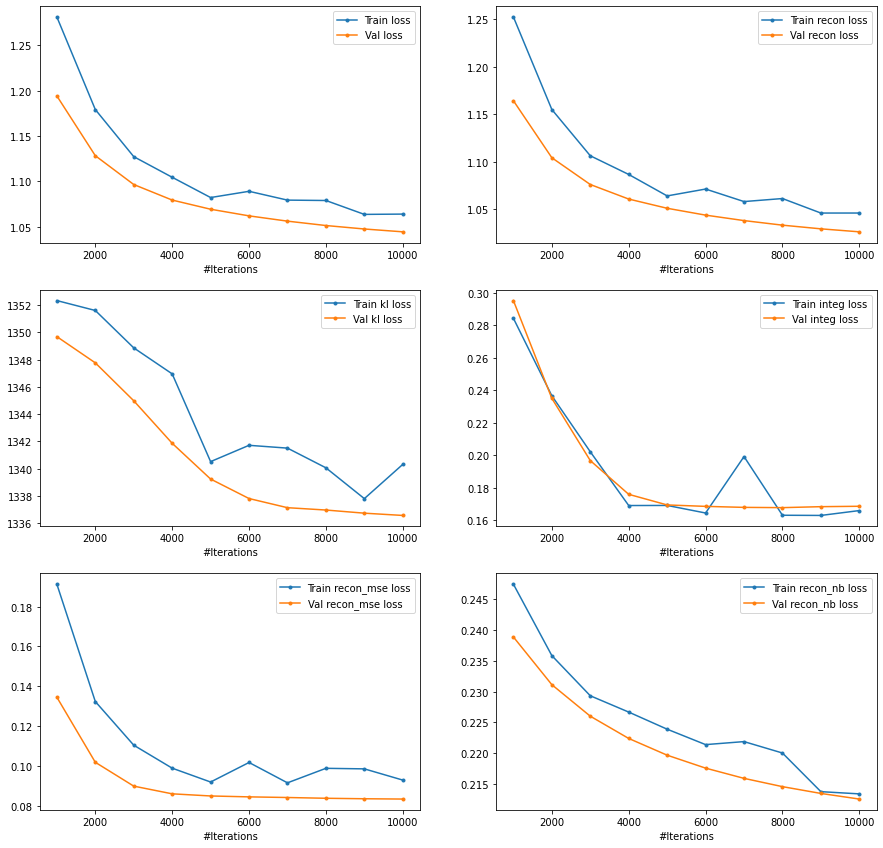

In [67]:
plt.figure(figsize=(15, 20));
loss_names = ['recon', 'kl', 'integ', 'recon_mse', 'recon_nb']#, 'recon_bce']
# nrows = int(np.ceil((len(loss_names)+1)/2))
nrows = 4

plt.subplot(nrows, 2, 1)
plt.plot(new_model.history['iteration'], new_model.history['train_loss'], '.-', label='Train loss');
plt.plot(new_model.history['iteration'], new_model.history['val_loss'], '.-', label='Val loss');
plt.xlabel('#Iterations');
plt.legend()

for i, name in enumerate(loss_names):
    plt.subplot(nrows, 2, i+2)
    plt.plot(new_model.history['iteration'], new_model.history[f'train_{name}'], '.-', label=f'Train {name} loss');
    plt.plot(new_model.history['iteration'], new_model.history[f'val_{name}'], '.-', label=f'Val {name} loss');
    plt.xlabel('#Iterations');
    plt.legend()


In [69]:
out = new_model.test(
        adatas=[[scrna1, scrna2, scrna3, scrna4, scrna_query3],
                [cite1, cite2, cite4, cite_query3], 
                [atac3]],
        names=[['rna1', 'rna2', 'rna3', 'rna4', "rna_q3"], 
               ['cite1', 'cite2', 'cite4', "cite_q3"], 
               ['atac3']],
        pair_groups=[["pair1", "pair2", "pair3", "pair4", "pair3q"], 
                     ["pair1", "pair2", "pair4", "pair3q"], 
                     ["pair3"]],
        layers=[['count', 'count', 'count', 'count', 'count'], 
                [None, None, None, None], 
                [None]],
        batch_labels=[[0, 1, 2, 3, 4],
                     [0, 1, 2, 3],
                     [0]],
        batch_size=64
)

In [71]:
integrated, _, _, _ = out
sc.pp.neighbors(integrated)
sc.tl.umap(integrated)

# Vizualize results

In [72]:
integrated.obs['reference'] = 'control (reference)'

Trying to set attribute `.obs` of view, copying.


In [73]:
integrated.obs.loc[(integrated.obs.study == 'pair3q'), 'reference']='COVID-19 (query)'

In [74]:
integrated.obs['reference'] = integrated.obs['reference'].astype('category')

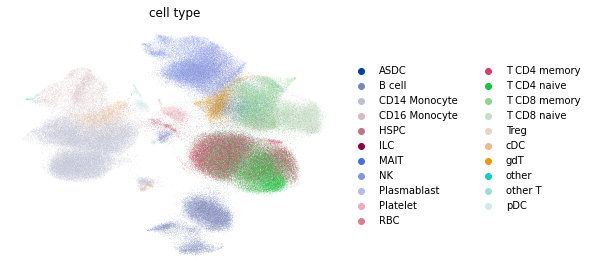

In [76]:
f, ax = plt.subplots(1, 1, figsize=(6,4.5))
sc.pl.umap(integrated, color=['cell_type'], title='cell type', palette=sc.pl.palettes.default_28, frameon=False, ax=ax, show=False)
plt.savefig("cell_type.png", bbox_inches='tight', dpi=DPI)

In [77]:
scrna_query3.obs_names = [name[:-2] for name in scrna_query3.obs_names]
scrna_query3.obs_names

Index(['AAACCTGAGAAACCTA-MH9179824', 'AAACCTGAGAGTAATC-MH9179824',
       'AAACCTGAGAGTGAGA-MH9179824', 'AAACCTGAGGAATCGC-MH9179824',
       'AAACCTGAGTGTTGAA-MH9179824', 'AAACCTGCACCACGTG-MH9179824',
       'AAACCTGCAGATTGCT-MH9179824', 'AAACCTGGTAAGGGAA-MH9179824',
       'AAACCTGGTCAAACTC-MH9179824', 'AAACCTGGTCCATGAT-MH9179824',
       ...
       'BGCV15_TTTGCGCAGCGAAGGG-1', 'BGCV15_TTTGCGCCATGTTCCC-1',
       'BGCV15_TTTGCGCGTTCATGGT-1', 'BGCV15_TTTGCGCTCCATGAGT-1',
       'BGCV15_TTTGCGCTCCCACTTG-1', 'BGCV15_TTTGGTTGTTGGGACA-1',
       'BGCV15_TTTGTCAAGGCGATAC-1', 'BGCV15_TTTGTCACAGACACTT-1',
       'BGCV15_TTTGTCAGTTACGGAG-1', 'BGCV15_TTTGTCATCGAATGGG-1'],
      dtype='object', length=527286)

In [78]:
integrated.obs_names=integrated.obs.barcode

In [79]:
integrated.obs['severity'] = 'Control'

In [80]:
integrated.obs.loc[(integrated.obs.study == 'pair3q'), 'severity'] = scrna_query3[integrated[integrated.obs.study == 'pair3q'].obs_names].obs['Worst_Clinical_Status'].values

In [81]:
integrated.obs.severity.astype('category')

barcode
L1_AAACCCATCTCCCTAG-0          Control
L1_AAACCCATCTGCGGAC-0          Control
L1_AAACGAAAGGCCCAAA-0          Control
L1_AAACGAAAGTTACTCG-0          Control
L1_AAACGAACACAGCATT-0          Control
                                ...   
BGCV15_TTTCCTCTCTGATACG-1-2    Control
BGCV15_TTTCCTCTCTTTAGGG-1-2    Control
BGCV15_TTTGCGCTCACCGTAA-1-2    Control
BGCV15_TTTGGTTTCAAGATCC-1-2    Control
BGCV15_TTTGTCACAAGCCATT-1-2    Control
Name: severity, Length: 206222, dtype: category
Categories (7, object): ['Asymptomatic', 'Control', 'Critical ', 'Death', 'Mild', 'Moderate', 'Severe']

In [82]:
integrated.obs['condition'] = 'control (reference)'

In [83]:
integrated.obs.loc[(integrated.obs.severity == 'Asymptomatic'), 'condition']='moderate COVID-19 (query)'
integrated.obs.loc[(integrated.obs.severity == 'Mild'), 'condition']='moderate COVID-19 (query)'
integrated.obs.loc[(integrated.obs.severity == 'Moderate'), 'condition']='moderate COVID-19 (query)'
integrated.obs.loc[(integrated.obs.severity == 'Severe'), 'condition']='severe COVID-19 (query)'
integrated.obs.loc[(integrated.obs.severity == 'Critical'), 'condition']='severe COVID-19 (query)'
integrated.obs.loc[(integrated.obs.severity == 'Death'), 'condition']='severe COVID-19 (query)'

In [84]:
integrated.obs['condition'] = integrated.obs['condition'].astype('category')

In [85]:
integrated.obs['condition']

barcode
L1_AAACCCATCTCCCTAG-0          control (reference)
L1_AAACCCATCTGCGGAC-0          control (reference)
L1_AAACGAAAGGCCCAAA-0          control (reference)
L1_AAACGAAAGTTACTCG-0          control (reference)
L1_AAACGAACACAGCATT-0          control (reference)
                                      ...         
BGCV15_TTTCCTCTCTGATACG-1-2    control (reference)
BGCV15_TTTCCTCTCTTTAGGG-1-2    control (reference)
BGCV15_TTTGCGCTCACCGTAA-1-2    control (reference)
BGCV15_TTTGGTTTCAAGATCC-1-2    control (reference)
BGCV15_TTTGTCACAAGCCATT-1-2    control (reference)
Name: condition, Length: 206222, dtype: category
Categories (3, object): ['control (reference)', 'moderate COVID-19 (query)', 'severe COVID-19 (query)']

/home/icb/litinetskaya/miniconda3/envs/multigrate/lib/python3.7/site-packages/anndata/_core/anndata.py:1210: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'severity' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'severity' as categorical


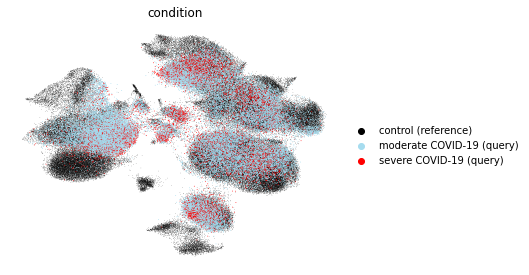

In [86]:
f, ax = plt.subplots(1, 1, figsize=(6,4.5))
sc.pl.umap(integrated[integrated.obs.condition == 'control (reference)'], color=['condition'], palette=["black", "#a6dcef"], frameon=False, ax=ax, show=False, zorder=1)
sc.pl.umap(integrated[integrated.obs.condition != 'control (reference)'], color=['condition'], palette=["#a6dcef", "red", "#00a8cc"], frameon=False, ax=ax, show=False, zorder=2)
plt.savefig("condition.png", bbox_inches='tight', dpi=DPI)

In [89]:
integrated.obs.study.value_counts()

pair4     97039
pair3q    50000
pair2     27825
pair1     21358
pair3     10000
Name: study, dtype: int64

In [90]:
integrated.obs.batch = 'Dataset 1 (reference)'

In [91]:
integrated.obs.loc[(integrated.obs.study == 'pair3q'), 'batch']='Dataset 4 (query)'
integrated.obs.loc[(integrated.obs.study == 'pair4'), 'batch']='Dataset 4 (reference)'
integrated.obs.loc[(integrated.obs.study == 'pair1'), 'batch']='Dataset 2 (reference)'
integrated.obs.loc[(integrated.obs.study == 'pair2'), 'batch']='Dataset 2 (reference)'

In [92]:
integrated.obs.batch = integrated.obs.batch.astype('category')

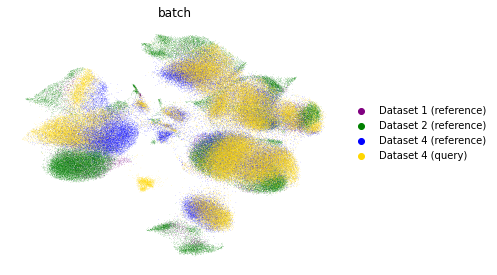

In [105]:
f, ax = plt.subplots(1, 1, figsize=(6,4.5))
sc.pl.umap(integrated, color=['batch'], palette=["purple", "green", "blue", "gold"], frameon=False, ax=ax, show=False, zorder=1)
handles, labels = ax.get_legend_handles_labels()
labels = [labels[0], labels[1], labels[3], labels[2]]
ax.legend(handles, labels, frameon=False, bbox_to_anchor=(1, 0.7))
plt.savefig("batch.png", bbox_inches='tight', dpi=DPI)

# Cell type transfer

In [126]:
X = integrated[integrated.obs.study != 'pair3q'].X

In [127]:
y = integrated.obs.cell_type[integrated.obs.study != 'pair3q'].values

In [128]:
X_test = integrated[(integrated.obs.study == 'pair3q')].X

In [129]:
y_true = integrated.obs.cell_type[(integrated.obs.study == 'pair3q')].values

In [130]:
clf = RandomForestClassifier(random_state=0, class_weight = "balanced_subsample", n_jobs=-1)

In [131]:
clf.fit(X, y)

RandomForestClassifier(class_weight='balanced_subsample', n_jobs=-1,
                       random_state=0)

In [132]:
y_pred = clf.predict(X_test)

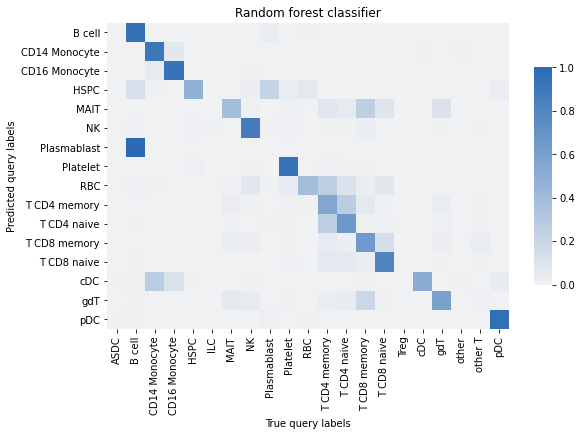

In [133]:
# adjusted from https://yoseflab.github.io/scvi-tools-reproducibility/scarches_totalvi_seurat_data/ (accessed on 25.05.21)
confusion_matrix = pd.crosstab(
    y_true, 
    y_pred,
    rownames=["True query labels"],
    colnames=["Predicted query labels"],
)
confusion_matrix /= confusion_matrix.sum(0)

fig, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(
    confusion_matrix.transpose(),
    ax=ax,
    square=True,
    cbar_kws=dict(shrink=0.5, aspect=12),
    cmap=sns.color_palette("light:#2b6bb4", as_cmap=True),
    vmax=1
)
ax.set_title('Random forest classifier')
fig.savefig("confusion_matrix_random_forest.pdf", dpi=DPI, bbox_inches="tight")

In [134]:
print(classification_report(y_true, 
    y_pred))

/home/icb/litinetskaya/miniconda3/envs/multigrate/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/icb/litinetskaya/miniconda3/envs/multigrate/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

         ASDC       0.00      0.00      0.00        12
       B cell       0.95      0.95      0.95      5762
CD14 Monocyte       0.91      0.97      0.94     10744
CD16 Monocyte       0.94      0.50      0.65      1675
         HSPC       0.49      0.45      0.47       307
          ILC       0.00      0.00      0.00        60
         MAIT       0.39      0.19      0.26       715
           NK       0.88      0.97      0.92      8601
  Plasmablast       0.00      0.00      0.00       419
     Platelet       0.94      0.69      0.80      1310
          RBC       0.39      0.24      0.30       201
 T CD4 memory       0.56      0.71      0.62      5587
  T CD4 naive       0.66      0.54      0.60      4996
 T CD8 memory       0.65      0.79      0.71      4923
  T CD8 naive       0.81      0.53      0.64      2176
         Treg       0.00      0.00      0.00        29
          cDC       0.51      0.78      0.62       546
         

/home/icb/litinetskaya/miniconda3/envs/multigrate/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
